In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import roc_curve , auc , precision_recall_curve ,accuracy_score
from sklearn.metrics import classification_report , mean_squared_error , r2_score , confusion_matrix

In [5]:
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree  import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("C:/Users/DELL/ML TOUTI/IT/PHD/AI/Datasets/BarikaN.csv" , sep = ';')

In [7]:
data.head()

,YEAR,MO,DY,T_MAX,T_MIN,RH,PREC,WS_RANGE,Latitude,Longitude,CLASSES
0,2015,5,2,32.15,15.19,31.62,0.0,6.61,35.4177,5.3289,Fire
1,2015,5,3,33.94,16.20,24.44,0.0,3.22,35.4177,5.3289,Fire
2,2015,5,4,35.03,17.20,18.44,0.0,5.04,35.4177,5.3289,Fire
3,2015,5,5,35.73,18.25,19.69,0.0,4.72,35.4177,5.3289,Fire
4,2015,5,6,33.80,17.67,26.50,0.0,6.72,35.4177,5.3289,Fire


In [8]:
data.tail()

,YEAR,MO,DY,T_MAX,T_MIN,RH,PREC,WS_RANGE,Latitude,Longitude,CLASSES
21506,2023,5,27,30.91,16.40,41.69,0.46,3.66,35.148,5.1003,noFire
21507,2023,5,28,30.13,17.07,44.56,0.06,8.06,35.148,5.1003,noFire
21508,2023,5,29,26.87,15.35,54.31,0.62,7.56,35.148,5.1003,noFire
21509,2023,5,30,27.26,14.76,53.88,0.04,5.27,35.148,5.1003,noFire
21510,2023,5,31,24.44,14.22,58.44,0.41,2.37,35.148,5.1003,noFire


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21511 entries, 0 to 21510
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         21511 non-null  int64  
 1   MO           21511 non-null  int64  
 2   DY           21511 non-null  int64  
 3   T_MAX        21511 non-null  float64
 4   T_MIN        21511 non-null  float64
 5   RH           21511 non-null  float64
 6   PREC         21511 non-null  float64
 7   WS_RANGE     21511 non-null  float64
 8   Latitude     21511 non-null  float64
 9   Longitude    21511 non-null  float64
 10  CLASSES      21511 non-null  object 
dtypes: float64(7), int64(3), object(1)
memory usage: 1.8+ MB


In [10]:
data.shape

(21511, 11)

In [11]:
data.describe(include='all')

,YEAR,MO,DY,T_MAX,T_MIN,RH,PREC,WS_RANGE,Latitude,Longitude,CLASSES
count,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noFire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16750
mean,2018.720794,6.350472,15.724374,25.761258,12.745521,49.492298,0.684672,4.468189,35.241371,5.281629,NaN
std,2.436789,3.461905,8.797919,9.317821,8.171351,17.538972,2.875375,1.797226,0.124050,0.104065,NaN
min,2015.000000,1.000000,1.000000,2.580000,-4.380000,9.500000,0.000000,0.840000,35.078400,5.100300,NaN
25%,2017.000000,3.000000,8.000000,17.970000,5.760000,35.440000,0.000000,3.140000,35.130700,5.219000,NaN
50%,2019.000000,6.000000,16.000000,24.970000,11.830000,49.250000,0.000000,4.200000,35.209300,5.276700,NaN
75%,2021.000000,9.000000,23.000000,33.620000,19.710000,63.560000,0.120000,5.490000,35.393100,5.370100,NaN


In [12]:
data.isna().sum()

YEAR           0
MO             0
DY             0
T_MAX          0
T_MIN          0
RH             0
PREC           0
WS_RANGE       0
Latitude       0
Longitude      0
CLASSES        0
dtype: int64

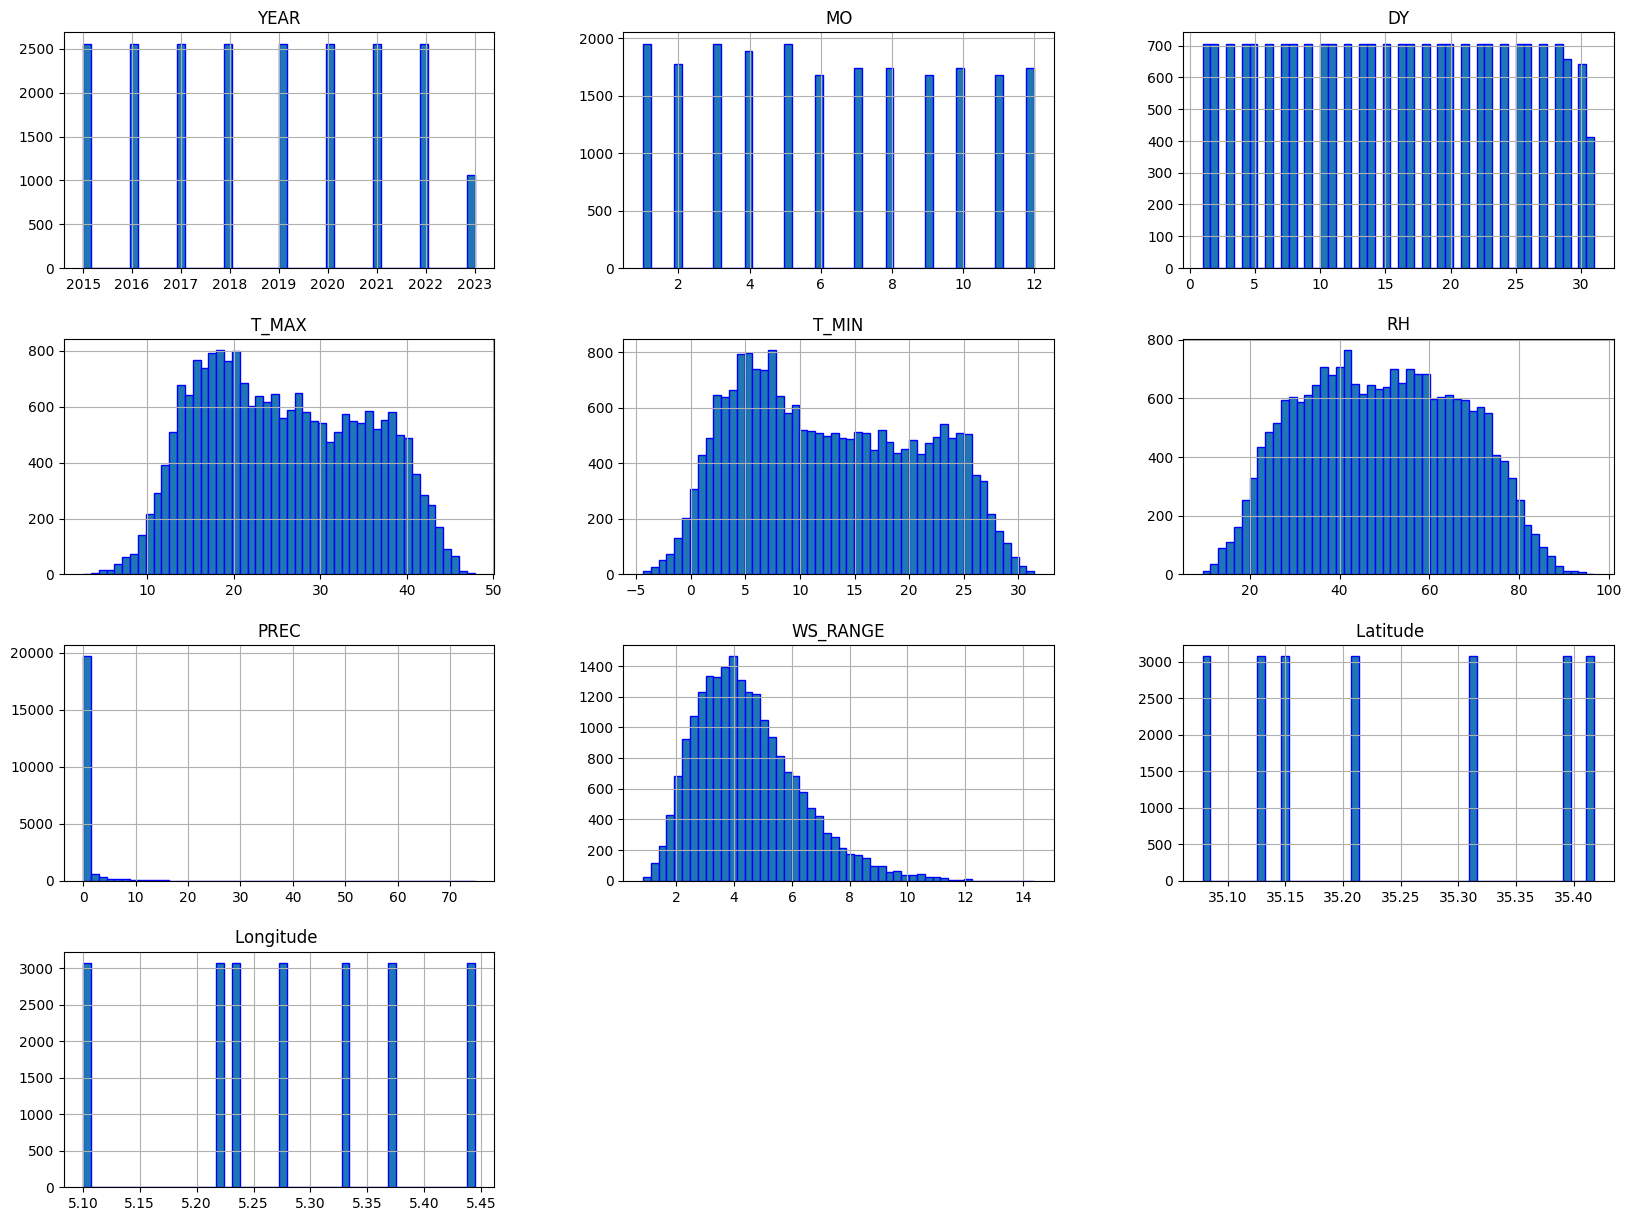

In [13]:
data.hist(bins=50,figsize=(20,15),ec='b')
plt.show()

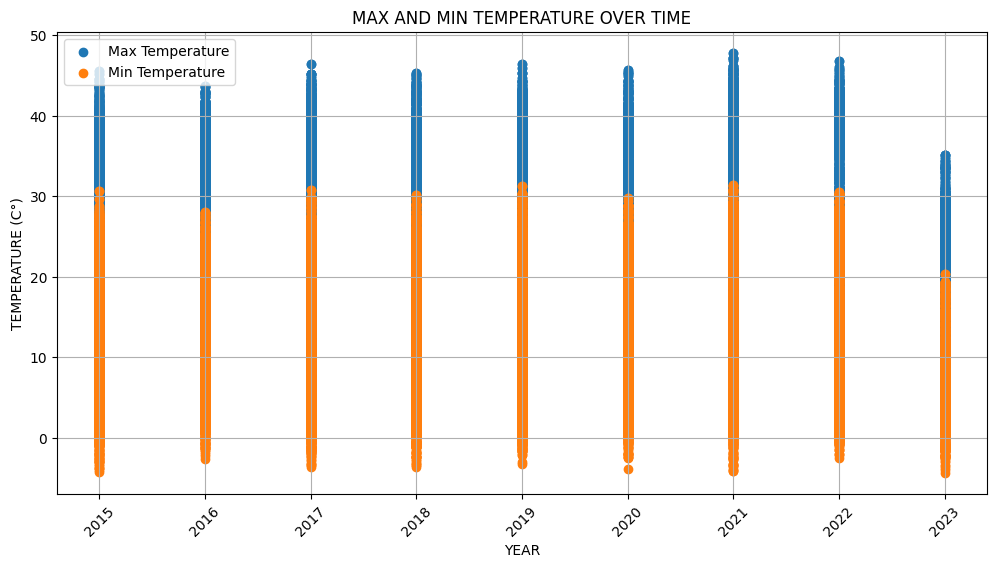

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(data['YEAR'],data['T_MAX'],label='Max Temperature', marker='o')
plt.scatter(data['YEAR'],data['T_MIN'] , label='Min Temperature' , marker= 'o' )
plt.xlabel('YEAR')
plt.ylabel('TEMPERATURE (C°)')
plt.title('MAX AND MIN TEMPERATURE OVER TIME')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

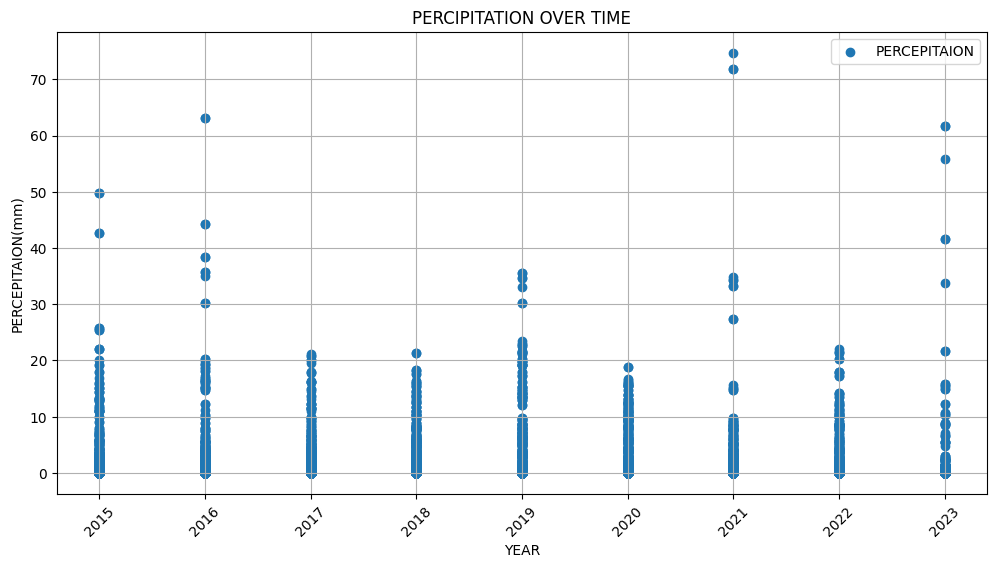

In [15]:


plt.figure(figsize=(12,6))
plt.scatter(data['YEAR'],data['PREC'],label='PERCEPITAION', marker='o')
plt.xlabel('YEAR')
plt.ylabel('PERCEPITAION(mm)')
plt.title('PERCIPITATION OVER TIME')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
percentage = data.CLASSES.value_counts(normalize = True)*100
percentage

CLASSES
noFire    77.867138
Fire      22.132862
Name: proportion, dtype: float64

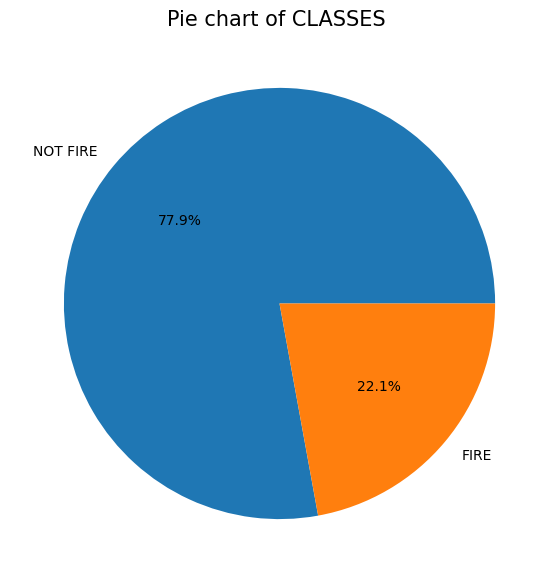

In [17]:
classeslabels=["NOT FIRE","FIRE"]
plt.figure(figsize= (12,7))
plt.pie(percentage,labels=classeslabels , autopct='%1.1f%%')
plt.title('Pie chart of CLASSES ' , fontsize = 15)
plt.show()

In [18]:
data['CLASSES'] = data['CLASSES'].map({'Fire' : 1 , 'noFire' : 0 } )
data['CLASSES']

0        1
1        1
2        1
3        1
4        1
        ..
21506    0
21507    0
21508    0
21509    0
21510    0
Name: CLASSES, Length: 21511, dtype: int64

In [19]:
X = data.drop('CLASSES',axis= 1)
y = data['CLASSES']

In [20]:
X_train , X_test , y_train , y_test , = train_test_split(X , y ,test_size = 0.2 , random_state = 42 )

In [21]:
X_save=  X_test

In [22]:
class_counts =  y_test.value_counts()
num_classes = len(class_counts)
print ("Number  of classes :" , num_classes)
print(class_counts)

Number  of classes : 2
CLASSES
0    3360
1     943
Name: count, dtype: int64


In [23]:
logreg_model=LogisticRegression()
logreg_model.fit(X_train , y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_predictions_numeric = [1 if pred == 'Fire' else 0 for pred in logreg_predictions]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
X_test

,YEAR,MO,DY,T_MAX,T_MIN,RH,PREC,WS_RANGE,Latitude,Longitude
423,2022,6,7,37.48,21.49,34.56,0.02,6.38,35.4177,5.3289
7948,2017,1,28,10.97,1.50,80.62,2.77,6.84,35.3931,5.2190
6624,2021,1,4,5.73,-3.99,74.12,0.00,5.78,35.4177,5.3289
20576,2020,1,21,11.96,5.73,53.44,0.00,6.91,35.1480,5.1003
6281,2019,12,11,12.23,0.62,73.94,0.02,4.06,35.4177,5.3289
...,...,...,...,...,...,...,...,...,...,...
12477,2015,9,21,30.26,16.55,35.75,0.00,5.57,35.2093,5.3701
15073,2017,3,1,23.44,6.61,49.00,0.00,2.70,35.1307,5.4443
9625,2022,11,5,19.78,7.97,65.62,0.02,6.23,35.3931,5.2190
15878,2020,2,26,22.98,7.51,46.94,0.00,4.88,35.1307,5.4443


In [25]:
logreg_predictions

array([1, 0, 0, ..., 0, 0, 0])

In [26]:
logreg_model.score(X_test , y_test)

0.978387171740646

In [27]:

accuracy = accuracy_score(y_test , logreg_predictions)
print("Logistic Regression Accuracy :  " , accuracy)

Logistic Regression Accuracy :   0.978387171740646


In [28]:
print ("Logistic Regression Classificatnion Report :")
print(classification_report(y_test,logreg_predictions))

Logistic Regression Classificatnion Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3360
           1       0.95      0.95      0.95       943

    accuracy                           0.98      4303
   macro avg       0.97      0.97      0.97      4303
weighted avg       0.98      0.98      0.98      4303



In [29]:
cm = confusion_matrix(y_test , logreg_predictions_numeric)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[3360    0]
 [ 943    0]]


In [30]:
actual_predicted = pd.DataFrame({'Actual data' : y_test , 'predicted data ' : logreg_predictions})
actual_predicted

,Actual data,predicted data
423,1,1
7948,0,0
6624,0,0
20576,0,0
6281,0,0
...,...,...
12477,0,0
15073,0,0
9625,0,0
15878,0,0


In [31]:
result_df = pd.concat([X_test,actual_predicted] , axis = 1) 
result_df.to_excel('lRpredictions.xlsx', index=False)

In [32]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train , y_train)
rf_predictions = rf_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test , rf_predictions)
print("Random Forest accuracy :" , accuracy )

Random Forest accuracy : 0.9993028119916337


In [34]:
report = classification_report (y_test , rf_predictions)
print("Random Forest Classification Report:" , report )

Random Forest Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3360
           1       1.00      1.00      1.00       943

    accuracy                           1.00      4303
   macro avg       1.00      1.00      1.00      4303
weighted avg       1.00      1.00      1.00      4303



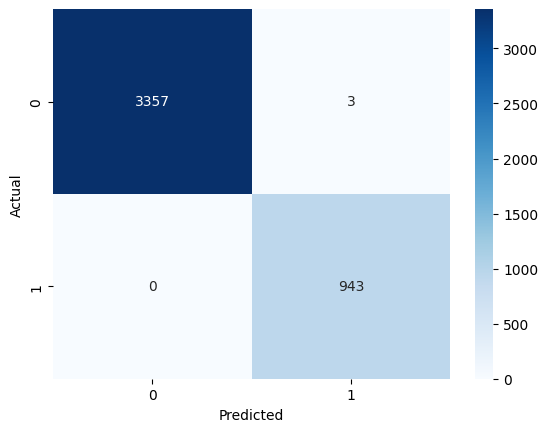

In [35]:
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

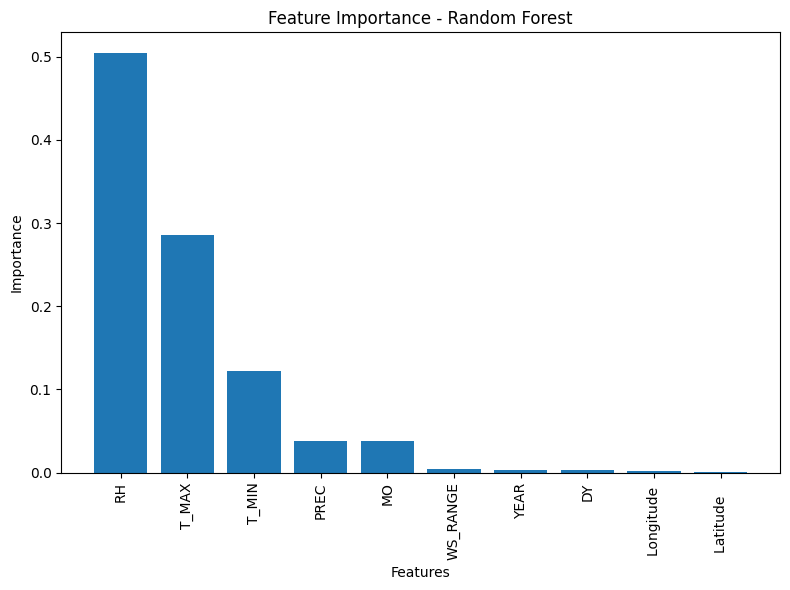

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [41]:
actual_predicted = pd.DataFrame({'Actual data': y_test, 'Predicted data': rf_predictions})
print(actual_predicted)

       Actual data  Predicted data
423              1               1
7948             0               0
6624             0               0
20576            0               0
6281             0               0
...            ...             ...
12477            0               0
15073            0               0
9625             0               0
15878            0               0
7739             0               0

[4303 rows x 2 columns]


In [42]:
result = pd.concat([X_test, actual_predicted], axis=1)
result.to_excel('RFpredictions.xlsx', index=False)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)
y_pred  = knn.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9890773878689286


In [46]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3330   30]
 [  17  926]]


In [47]:
print("K Nearest Neighbors - Classification Report:")
print(classification_report(y_test, y_pred))

K Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3360
           1       0.97      0.98      0.98       943

    accuracy                           0.99      4303
   macro avg       0.98      0.99      0.98      4303
weighted avg       0.99      0.99      0.99      4303



In [48]:
actual_predicted = pd.DataFrame({'Actual data': y_test, 'Predicted data': y_pred})
print(actual_predicted)

       Actual data  Predicted data
423              1               1
7948             0               0
6624             0               0
20576            0               0
6281             0               0
...            ...             ...
12477            0               0
15073            0               0
9625             0               0
15878            0               0
7739             0               0

[4303 rows x 2 columns]


In [49]:
result_df = pd.concat([X_test, actual_predicted], axis=1)
result_df.to_excel('knnpredictions.xlsx', index=False)

In [50]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)

In [51]:
y_pred = svm_model.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.855682082268185


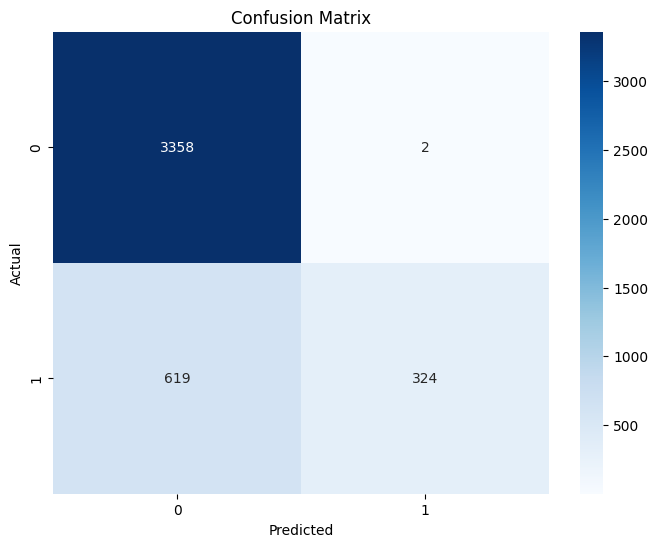

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3360
           1       0.99      0.34      0.51       943

    accuracy                           0.86      4303
   macro avg       0.92      0.67      0.71      4303
weighted avg       0.88      0.86      0.83      4303

